<a href="https://colab.research.google.com/github/firaz-thakur/SEOUL-BIKE-SHARING-DEMAND-PREDICTION/blob/main/Supervised_ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title :** **Bike Sharing Demand Prediction**



#**Problem Description :**

##Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it reduces waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes using the values in the other columns.With the of historical datas,we should be able to estimate the bike count required at each hour.

#**Data Description :**

##The dataset contains weather information such as Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall, the number of bikes rented per hour and date information.

#  **Attribute Information :**

* ## Rented Bike count - Count of bikes rented at each hour

* ## Seasons - Winter, Spring, Summer, Autumn
* ## Temperature-Temperature in Celsius
* ## Dew point temperature - Celsius
* ## Solar radiation - MJ/m2
* ## Date : year-month-day

* ## Hour - Hour of he day

* ## Humidity - %

* ## Windspeed - m/s

* ## Visibility - 10m


* ## Rainfall - mm
* ## Snowfall - cm




* ## Holiday - Holiday/No holiday

* ## Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


#**Approach to our Business Problem :**



1.   ## Data Analysis
2.   ## Feature Engineering


3.   ## Feature Selection
4.   ## Model Building

5.   ## Model Deployment


6.   ## Conclusion 











#**Importing all the libraries that are required for Analysis :**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings("ignore")


#**Downloading the Data :**

In [2]:
# Mounting Google Drive: 
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Creating Path for Data:
data = pd.read_csv("/content/drive/MyDrive/Data Science (Alma Better)/Machine learning (Module 4)/Linear Regression/CAPSTONE PROJ - LINEAR REGRESSION/SeoulBikeData.csv", encoding="latin1")
df = pd.DataFrame(data)

In [5]:
# Checking the Loaded Data :
# First 5 Rows :
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Last 5 Rows :
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Some more basic information about the data :
df.shape
print (f'The Total numbers of Rows and Columns are {df.shape} ')

The Total numbers of Rows and Columns are (8760, 14) 


In [8]:
# Know the total number of columns :
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Summary of the Dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Statistical description of the data set :
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [11]:
# Getting the unique values :
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

#**Pre-Processing the DataSet :**

## **Missing Values :**
* ## Why do we need to handle missing values ? 
#### Since, real world data has lot of missing values in it. The casue of missing values can be data corruption or missing information.Handling of the missing values is more important as many machine algorithm does not support missing values and our model can fail or mislead us.
#### So,our first priority is to deal with this missing values.




In [12]:
# We will sort the column first on the basis of missing data :
missing_data = df.isnull().sum()

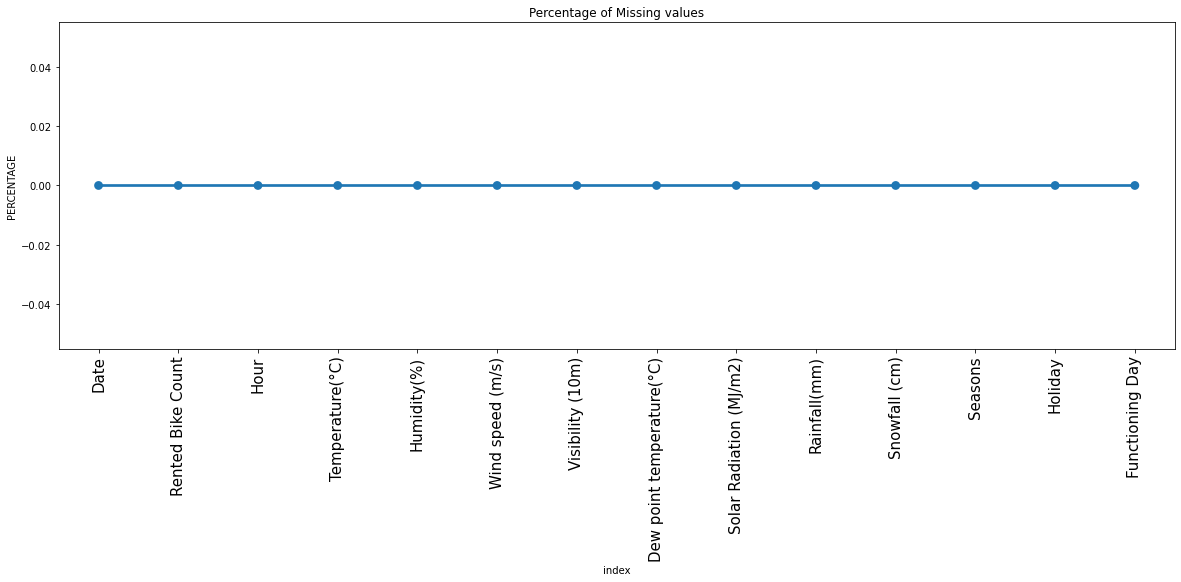

In [13]:
# Plotting a graph just to represent it clearly :
missing_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(20,6))
ax = sns.pointplot('index',0,data=missing_data)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

 ## In the graph it is clearly shown that there is no Null values present in the data set.


## **Duplicate Values :**
* ## Why do we need to remove duplicate values ?
#### Duplicate values are caused due to the error of data collection or during data entry. By removing the duplication from the data set we will refine the data and make our model more sustainable.








In [14]:
# Checking Duplicate Values :
len(df[df.duplicated()])

0

 ## Since, there is no duplicate value in our data set.

## ***Renaming the columns name :***
* ## Why do we need to rename the coulmn name?
#### We rename the column name just to make it more readable in the data set for better understanding.




In [15]:
# Renaming the Columns names and then checking the updated data set :
df = df.rename(columns={'Rented Bike Count': 'Bike_count', 'Hour': 'Hour','Temperature(°C)': 'Temp', 'Humidity(%)': 'Humidity', 
                   'Wind speed (m/s)': 'Wind','Visibility (10m)': 'Visibility', 'Dew point temperature(°C)': 'Dew_temp',
                   'Solar Radiation (MJ/m2)': 'Sunlight', 'Rainfall(mm)': 'Rain',
                   'Snowfall (cm)': 'Snow','Seasons': 'Season', 'Holiday': 'Holiday', 'Functioning Day': 'Functioning_day'})

In [16]:
# Checking the updated df :
df.head()

,Date,Bike_count,Hour,Temp,Humidity,Wind,Visibility,Dew_temp,Sunlight,Rain,Snow,Season,Holiday,Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## **Extracting Date, Month, Year from Date column :**
#### We are extracting some extra columns to get more meaningful insights.


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

# Computing day :
df['Day']=df['Date'].dt.day
# Computing month :            
df['Month']=df['Date'].dt.month    
# Computing year :     
df['Year']=df['Date'].dt.year        

# Dropping of column Date :
df.drop(columns=["Date"],inplace=True)

In [18]:
# It always a good practice whatever code u execute, print and check it :
df.head()

,Bike_count,Hour,Temp,Humidity,Wind,Visibility,Dew_temp,Sunlight,Rain,Snow,Season,Holiday,Functioning_day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


# **Exploratory Data Analysis and Visualization :**
* ## Why do we perform EDA?
 
 #### An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.



In [19]:
# Analyzing our data on the basis of dependent variable.
# Since, our dependent variable is "Bike count".So we need to analysis this column with the other columns by using some visualisation plot.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

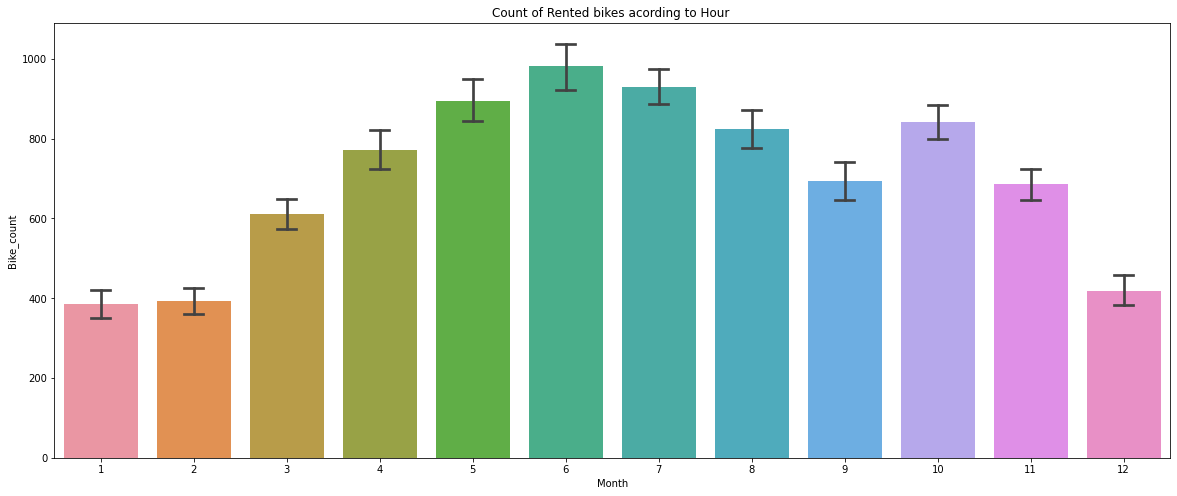

In [20]:
# Months v/s Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Month',y='Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

**Observations :** 
 
 from the bar plot graph we can clearly say :-
*  The highest months during which the count of rented bike is most is 6 and 7
 (i.e. june and july)
* The count of rented bikes is least during the starting of the month and end of the month. (i.e. january , february and december)  



[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

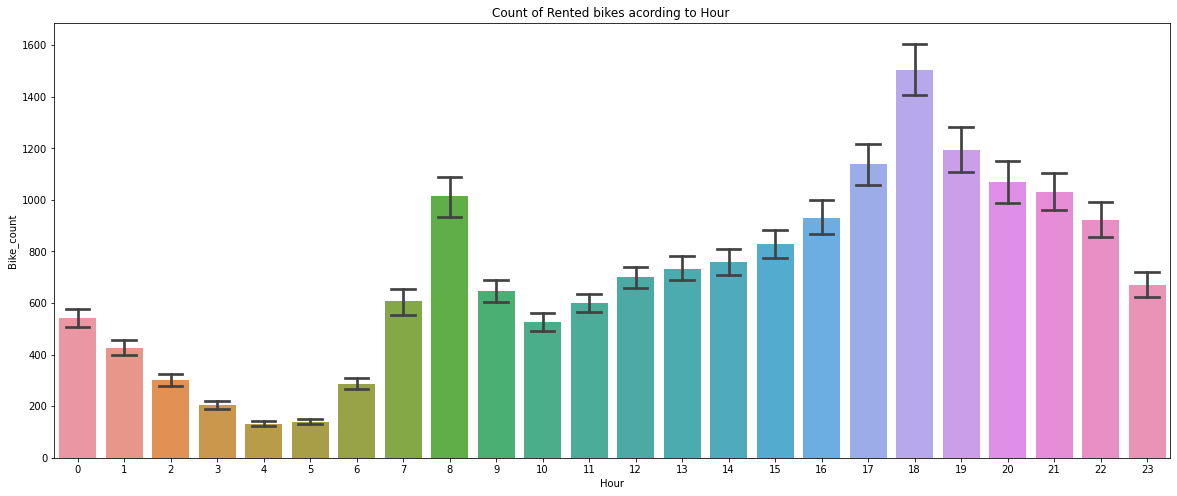

In [21]:
# Hours v/s Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Bike_count',ax=ax,capsize=.5)
ax.set(title='Count of Rented bikes acording to Hour ')

**Observations :**


*  The Peak time in which rented bikes are used more comparatively than remaining hours is from 7pm - 9pm. 



[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

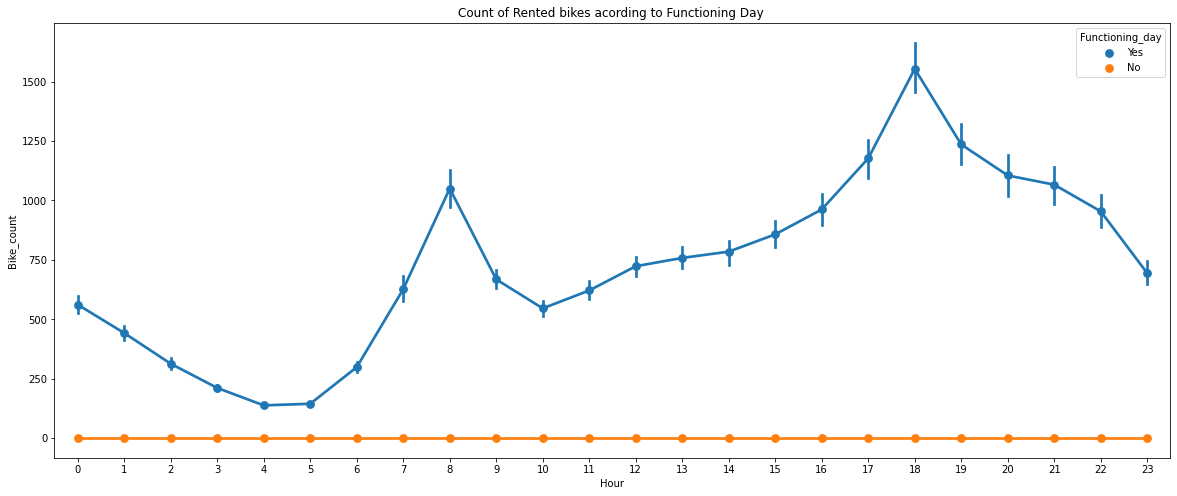

In [22]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Bike_count',hue='Functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

# **Changing Data type (D-Type) :**
#### From above information : columns Season, Holiday and Functioning_day are taken as a string by the python because the dtype of this columns are object.
#### To keep our analysis on right track, we need this string data to get converted into numerical data.

In [23]:
categorical_features = [i for i in df.columns if i not in df.describe().columns]
print(f"this are the categorical columns: {categorical_features}" )

this are the categorical columns: ['Season', 'Holiday', 'Functioning_day']


In [24]:
# Checking unique values with their count in categorical features :
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Season, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning_day, dtype: int64 



In [25]:
# Defining a label encoder for the above data :
encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'functioning_day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}

In [26]:
# Label Encoding :
df = df.replace(encoder)

# One Hot Encoding :
df = pd.get_dummies(df)

In [27]:
df.head()

,Bike_count,Hour,Temp,Humidity,Wind,Visibility,Dew_temp,Sunlight,Rain,Snow,...,Month,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_day_No,Functioning_day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1


In [28]:
# Checking the Dtype :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bike_count           8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temp                 8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   Wind                 8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   Dew_temp             8760 non-null   float64
 7   Sunlight             8760 non-null   float64
 8   Rain                 8760 non-null   float64
 9   Snow                 8760 non-null   float64
 10  Day                  8760 non-null   int64  
 11  Month                8760 non-null   int64  
 12  Year                 8760 non-null   int64  
 13  Season_Autumn        8760 non-null   uint8  
 14  Season_Spring        8760 non-null   uint8  
 15  Season_Summer        8760 non-null   u